## Description

This notebook performs the experiments for nudge impacts for distributions generated by Ising models.

In [1]:
import time
import os
import numpy as np
import networkx as nx
import pandas as pd
import ising_model
import matplotlib.pyplot as plt
import dit
import pickle
from tqdm import tqdm
from measures import rel_entropy

### Generate the network used for the SIS model

#### Network settings

In [1]:
number_of_nodes = 1000
network_degree = 2

#### Generate the network

In [ ]:
network_backup = ising_model.generate_powerlaw_network(number_of_nodes, network_degree)
network = network_backup.copy()
ising_model.set_values_nodes_sis(network)

In [ ]:
#Visualize the graph to see what you're working with
nx.draw(network)
plt.show()

### Gather samples to estimate the distributions by simulating the SIS model

#### SIS model settings

In [5]:
beta = 0.2
gamma = 0.1

#### simulation settings

In [4]:
timesteps = 1
number_of_samples = 2000
number_of_distributions = 30
beta=1

In [11]:
network = ising_model.generate_powerlaw_network(number_of_nodes, network_degree)
ising_model.set_values_nodes_sis(network)
#nx.write_gpickle(network, "{}/network{}_network_size{}_network_degree{}_beta{:.1f}_gamma{:.1f}.pkl".format(
#    samples_folder, distribution_number, number_of_nodes, network_degree, beta, gamma
#))
samples = pd.DataFrame(
    data=np.zeros((number_of_samples, len(network.nodes()))), 
    index=range(number_of_samples), 
    columns=network.nodes()
)
#Get the initialization
for node in network.nodes():
        samples.at[0, node] = network.node[node]["value"]
for sample_number in tqdm(range(1,number_of_samples)):
    #if sample_number%100 == 0 and sample_number != 0:
    #    print("sample number {}".format(sample_number))
    print(sum([network.node[node]["value"] for node in network.nodes()]))
    if sum([network.node[node]["value"] for node in network.nodes()]) == 0:
        print(sample_number)
        break
    
    ising_model.update_network_sis(network, timesteps, beta, gamma)
    #for node in network.nodes():
    #    samples.at[sample_number, node] = network.node[node]["value"]

#samples.to_pickle("{}/samples{}_network_size{}_network_degree{}_beta{:.1f}_gamma{:.1f}".format(
#    samples_folder, distribution_number, number_of_nodes, network_degree, beta,gamma
#))
#print(samples.loc[:, [1, 2]])
infecteds = samples.sum(axis=1)/samples.shape[1]
plt.plot(infecteds)
plt.show()


  0%|          | 1/1999 [00:00<05:57,  5.59it/s]

466
469


  0%|          | 3/1999 [00:00<05:28,  6.08it/s]

460
460


  0%|          | 5/1999 [00:00<05:13,  6.37it/s]

455
445


  0%|          | 7/1999 [00:01<05:06,  6.49it/s]

449
454


  0%|          | 9/1999 [00:01<05:07,  6.48it/s]

446
449


  1%|          | 11/1999 [00:01<05:38,  5.87it/s]

443
448


  1%|          | 12/1999 [00:01<05:50,  5.66it/s]

432


  1%|          | 14/1999 [00:02<06:34,  5.03it/s]

428
429


  1%|          | 16/1999 [00:02<06:04,  5.44it/s]

411
405


  1%|          | 18/1999 [00:03<05:39,  5.83it/s]

388
399


  1%|          | 20/1999 [00:03<06:10,  5.35it/s]

413
423


  1%|          | 22/1999 [00:03<05:48,  5.67it/s]

415
427


  1%|          | 24/1999 [00:04<05:49,  5.65it/s]

433
433


  1%|▏         | 26/1999 [00:04<05:41,  5.78it/s]

435
459


  1%|▏         | 28/1999 [00:04<05:22,  6.11it/s]

455
449


  2%|▏         | 30/1999 [00:05<05:22,  6.11it/s]

446
455


  2%|▏         | 32/1999 [00:05<05:19,  6.16it/s]

444
443


  2%|▏         | 34/1999 [00:05<06:04,  5.39it/s]

438
438


  2%|▏         | 36/1999 [00:06<05:43,  5.72it/s]

427
419


  2%|▏         | 38/1999 [00:06<05:20,  6.12it/s]

430
407


  2%|▏         | 40/1999 [00:06<05:23,  6.05it/s]

410
416


  2%|▏         | 42/1999 [00:07<05:16,  6.17it/s]

412
415


  2%|▏         | 44/1999 [00:07<05:13,  6.23it/s]

414
415


  2%|▏         | 46/1999 [00:07<05:07,  6.34it/s]

417
419


  2%|▏         | 48/1999 [00:08<05:15,  6.19it/s]

416
404


  3%|▎         | 50/1999 [00:08<05:16,  6.15it/s]

397
413


  3%|▎         | 52/1999 [00:08<05:07,  6.33it/s]

405
399


  3%|▎         | 54/1999 [00:09<05:28,  5.93it/s]

407
424


  3%|▎         | 56/1999 [00:09<05:19,  6.08it/s]

425
422


  3%|▎         | 58/1999 [00:09<05:10,  6.26it/s]

416
434


  3%|▎         | 60/1999 [00:09<05:07,  6.31it/s]

438
430


  3%|▎         | 62/1999 [00:10<05:11,  6.22it/s]

432
440


  3%|▎         | 64/1999 [00:10<05:09,  6.25it/s]

447
443


  3%|▎         | 66/1999 [00:10<05:28,  5.89it/s]

454
454


  3%|▎         | 68/1999 [00:11<05:08,  6.25it/s]

448
466


  4%|▎         | 70/1999 [00:11<05:04,  6.35it/s]

467
466


  4%|▎         | 72/1999 [00:11<05:32,  5.80it/s]

476
470


  4%|▎         | 74/1999 [00:12<05:16,  6.08it/s]

469
452


  4%|▍         | 76/1999 [00:12<05:34,  5.74it/s]

449
437


  4%|▍         | 78/1999 [00:12<05:28,  5.84it/s]

442
441


  4%|▍         | 80/1999 [00:13<05:14,  6.11it/s]

424
426


  4%|▍         | 82/1999 [00:13<05:15,  6.07it/s]

426
424


  4%|▍         | 84/1999 [00:13<05:32,  5.76it/s]

423
426


  4%|▍         | 86/1999 [00:14<05:16,  6.04it/s]

405
398


  4%|▍         | 88/1999 [00:14<05:10,  6.15it/s]

387
402


  5%|▍         | 90/1999 [00:14<05:02,  6.30it/s]

396
395


  5%|▍         | 92/1999 [00:15<04:59,  6.36it/s]

405
405


  5%|▍         | 94/1999 [00:15<04:54,  6.46it/s]

393
399


  5%|▍         | 96/1999 [00:15<04:56,  6.42it/s]

380
369


  5%|▍         | 98/1999 [00:16<04:56,  6.42it/s]

369
354


  5%|▌         | 100/1999 [00:16<05:32,  5.71it/s]

343
344


  5%|▌         | 102/1999 [00:16<05:12,  6.07it/s]

331
315


  5%|▌         | 104/1999 [00:17<05:11,  6.08it/s]

299
317


  5%|▌         | 106/1999 [00:17<05:26,  5.80it/s]

327
336


  5%|▌         | 108/1999 [00:17<05:15,  5.99it/s]

339
337


  6%|▌         | 110/1999 [00:18<05:08,  6.12it/s]

333
336


  6%|▌         | 112/1999 [00:18<04:59,  6.29it/s]

343
340


  6%|▌         | 114/1999 [00:18<05:12,  6.02it/s]

346
362


  6%|▌         | 116/1999 [00:19<05:12,  6.03it/s]

372
370


  6%|▌         | 118/1999 [00:19<05:03,  6.19it/s]

386
406


  6%|▌         | 120/1999 [00:19<04:56,  6.35it/s]

411
416


  6%|▌         | 122/1999 [00:19<04:57,  6.31it/s]

423
434


  6%|▌         | 124/1999 [00:20<04:58,  6.27it/s]

436
445


  6%|▋         | 126/1999 [00:20<05:08,  6.07it/s]

462
454


  6%|▋         | 128/1999 [00:20<05:11,  6.00it/s]

471
485


  7%|▋         | 130/1999 [00:21<05:20,  5.82it/s]

479
478


  7%|▋         | 132/1999 [00:21<05:13,  5.95it/s]

483
497


  7%|▋         | 134/1999 [00:21<04:58,  6.26it/s]

498
486


  7%|▋         | 136/1999 [00:22<04:48,  6.45it/s]

482
479


  7%|▋         | 138/1999 [00:22<05:32,  5.60it/s]

468
469


  7%|▋         | 140/1999 [00:23<05:50,  5.31it/s]

456
462


  7%|▋         | 142/1999 [00:23<05:29,  5.64it/s]

449
455


KeyboardInterrupt: 

In [8]:
network.node[node]["value"]

0

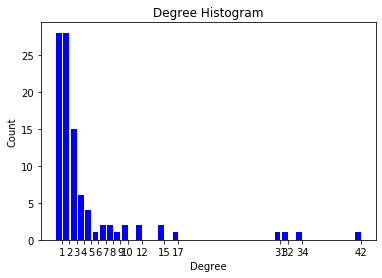

In [48]:
import collections
degree_sequence = sorted([d for n, d in network.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

#### perform the simulation and gather the samples and create the distributions

In [ ]:
start = time.time()

samples_folder = "sis_samples2"
if not os.path.exists(samples_folder):
    os.makedirs(samples_folder)

number_of_states = 2
max_number_of_neighbors = 9
distributions_folder = "sis_distributions"
gamma = 0.5
betas = np.linspace(0.1, 1, 19)
if not os.path.exists(distributions_folder):
    os.makedirs(distributions_folder)

folder_structure = "{}/beta{:.2f}/n{}/"
for beta in betas:
    for n in range(1,max_number_of_neighbors+1):
        folder_tomake = folder_structure.format(distributions_folder,beta,n)
        if not os.path.exists(folder_tomake):
            os.makedirs(folder_tomake)

timesteps = 1
number_of_samples = 1000
number_of_distributions = 30
number_of_nodes = 1000
network_degree = 2
#entropies = np.zeros((len(betas), max_number_of_neighbors))
for distribution_number in range(number_of_distributions):
    network = ising_model.generate_powerlaw_network(number_of_nodes, network_degree)
    nx.write_gpickle(network, "{}/network{}_network_size{}_network_degree{}.pkl".format(
        samples_folder, distribution_number, number_of_nodes, network_degree
    ))
    for b, beta in enumerate(betas):
        #reset the network after every sampling
        ising_model.set_values_nodes_sis(network)
        samples = pd.DataFrame(
            data=np.zeros((number_of_samples, len(network.nodes()))), 
            index=range(number_of_samples), 
            columns=network.nodes()
        )
        for node in network.nodes():
            samples.at[0, node] = network.node[node]["value"]
            
        for sample_number in tqdm(range(1,number_of_samples)):
            #if sample_number%100 == 0 and sample_number != 0:
            #    print("sample number {}".format(sample_number))

            ising_model.update_network_sis(network, timesteps, beta, gamma)
            for node in network.nodes():
                samples.at[sample_number, node] = network.node[node]["value"]

        samples.to_pickle("{}/samples{}_network_size{}_network_degree{}_beta{:.2f}_gamma{:.2f}".format(
            samples_folder, distribution_number, number_of_nodes, network_degree, beta,gamma
        ))

        selected_nodes = ising_model.select_nodes(network, max_number_of_neighbors)
        for selected_node in selected_nodes:
            #print(list(network.neighbors(selected_node)))
            distribution = ising_model.convert_samples_to_dit(
                samples, selected_node, list(network.neighbors(selected_node)),model="sis"
            )
            distribution.make_dense()
            #print(distribution)
            number_of_neighbors = distribution.outcome_length()-1
            count = 0
            #YgX = ising_model.get_transition_probabilities("sis", number_of_neighbors, (beta,gamma))
            #XY = (distribution.pmf[:,np.newaxis]*YgX).flatten()
            #entropies[b,number_of_neighbors-1] = rel_entropy(XY)
            
            dist_file = "{}/beta{:.2f}/n{}/d{}_gamma{:.2f}.pkl".format(
                distributions_folder, beta, number_of_neighbors, count,gamma
            )
            while os.path.exists(dist_file):
                count += 1
                dist_file = "{}/beta{:.2f}/n{}/d{}_gamma{:.2f}.pkl".format(
                    distributions_folder, beta, number_of_neighbors, count,gamma
                )
            with open(dist_file, "wb") as f:
                pickle.dump(distribution, f)
        
    
    #print(samples.loc[:, [1, 2]])
    
print("run time {}".format(time.time()-start))

100%|██████████| 999/999 [02:28<00:00,  6.74it/s]


100%|██████████| 999/999 [02:28<00:00,  6.73it/s]


 45%|████▍     | 448/999 [01:04<01:18,  7.04it/s]

In [26]:
entropies > 0.75

array([[False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, 

In [6]:
np.linspace(0.1, 1, 19)

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

### Convert the samples to distributions

#### settings for creating the distributions

In [ ]:
number_of_states = 2
max_number_of_neighbors = 9
distributions_folder = "sis_distributions"
if not os.path.exists(distributions_folder):
    os.makedirs(distributions_folder)

samples_folder = "sis_samples2"

In [ ]:

for count in range(number_of_distributions):
    network = nx.read_gpickle("{}/network{}_network_size{}_network_degree{}_beta{:.1f}_gamma{:.1f}.pkl".format(
        samples_folder, count, number_of_nodes, network_degree, beta,gamma
    ))
    samples = pd.read_pickle("{}/samples{}_network_size{}_network_degree{}_beta{:.1f}_gamma{:.1f}.pkl".format(
        samples_folder, count, number_of_nodes, network_degree, beta,gamma
    ))
    selected_nodes = ising_model.select_nodes(network, max_number_of_neighbors)
    for selected_node in selected_nodes:
        print(list(network.neighbors(selected_node)))
        distribution = ising_model.convert_samples_to_dit(
            samples, selected_node, list(network.neighbors(selected_node))
        )
#        print(distribution.shape)
#        output_label = set([len(distribution.shape) - 1])
#        input_labels = set(range(len(distribution.shape) - 1))
        #We don't actually need to split it into marginals and conditionals. 
        marginal, conditional = get_marginals(distribution)

        number_of_neighbors = marginal.outcome_length()
        filename_marginal = "{}/marginal{}_neighbors{}_network_size{}_network_degree{}_temp{:.2f}.pkl".format(
            distributions_folder, count, number_of_neighbors, number_of_nodes, network_degree, temperature
        )
        filename_conditional = "{}/conditional{}_neighbors{}_network_size{}_network_degree{}_temp{:.2f}.pkl".format(
            distributions_folder, count, number_of_neighbors, number_of_nodes, network_degree, temperature
        )
        with open(filename_marginal, "wb") as f:
            pickle.dump(marginal, f)
        with open(filename_conditional, "wb") as f:
            pickle.dump(conditional, f)
        #OLD
        #np.save(filename_marginal, marginal)
        #np.save(filename_conditional, conditional)
        #print(distribution)
        
        #input_distribution = 
        #conditional_output_distribution = 
        #save distributions



### Perform nudge experiments

In [ ]:

for count in range(number_of_distributions):
    for number_of_neighbors in range(1, max_number_of_neighbors):
        filename_marginal = "{}/marginal{}_neighbors{}_network_size{}_network_degree{}_temp{:.2f}.pkl".format(
            distributions_folder, count, number_of_neighbors, number_of_nodes, network_degree, temperature
        )
        
        filename_conditional = "{}/conditional{}_neighbors{}_network_size{}_network_degree{}_temp{:.2f}.pkl".format(
            distributions_folder, count, number_of_neighbors, number_of_nodes, network_degree, temperature
        )
        try:
            if os.path.getsize(filename_marginal) >0:
                with open(filename_marginal, "rb") as f:
                    marginal = pickle.load(f)
                    
            if os.path.getsize(filename_marginal) >0:
                with open(filename_conditional, "rb") as f:
                    conditional = pickle.load(f)            
        except IOError:
            print( "file not found")

### Inspect entropy of a certain node

Inspect the entropy of a certain node in the network for a certain degree

In [36]:
dist_file = "{}/beta{:.2f}/n{}/d{}_gamma{:.2f}.pkl".format("sis_distributions",0.16,4,4,0.1)
with open(dist_file, "rb") as f:
    d = pickle.load(f)

In [50]:
{(0,0,0,0,i): d[(0,0,0,0,i)] if (0,0,0,0,i) in d.outcomes else 0.0 for i in range(3)}

{(0, 0, 0, 0, 0): 0.9855, (0, 0, 0, 0, 1): 0.0, (0, 0, 0, 0, 2): 0.0}

In [2]:
str(1) +"_gamma0.10"

'1_gamma0.10'

In [11]:
a = np.arange(9).reshape((3,3))
b = a.sum(axis=0)
c = a *b[:,np.newaxis]
c

array([[  0,   9,  18],
       [ 36,  48,  60],
       [ 90, 105, 120]])

In [12]:
b[:,np.newaxis]

array([[ 9],
       [12],
       [15]])

In [15]:
import itertools
beta = 0.2
gamma = 0.1
degree = 3

states = list(itertools.product([0, 1], repeat=degree+1))
np.array([[1-beta*sum(state[:-1])/degree, beta*sum(state[:-1])/degree] if state[-1] == 0 else [gamma,1-gamma] for state in states])

array([[1.        , 0.        ],
       [0.1       , 0.9       ],
       [0.93333333, 0.06666667],
       [0.1       , 0.9       ],
       [0.93333333, 0.06666667],
       [0.1       , 0.9       ],
       [0.86666667, 0.13333333],
       [0.1       , 0.9       ],
       [0.93333333, 0.06666667],
       [0.1       , 0.9       ],
       [0.86666667, 0.13333333],
       [0.1       , 0.9       ],
       [0.86666667, 0.13333333],
       [0.1       , 0.9       ],
       [0.8       , 0.2       ],
       [0.1       , 0.9       ]])